In [1]:
#Import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Column 1: age in years
# Column 2: 1 = male, 0 = female
# Column 3: 1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic
# Column 4: resting blood pressure in mmHg
# Column 5: cholesterol in mg/dl
# Column 6: 1 means > 120 mg/dl, 0 means <= 120 mg/dl
# Column 7: resting electrocardiographic, 0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria
# Column 8: max heart rate achieved
# Column 9: 1 = yes, 2 = no
# Column 10: ST depression induced by exercise relative to rest
# Column 11: slope of the peak exercise ST segment, 1 = upsloping, 2 = flat, 3 = downsloping
# Column 12: number of major vessels (0-3) colored by flourosopy
# Column 13: 3 = normal, 6 = fixed defect, 7 = reversable defect
# Column 14: >=1 means heart disease, 0 = no heart disease

myNames = ["age", # column 1
        "sex", # col 2
        "chestPainType", # col 3
        "restingBP", # col 4
        "serumCholesterol", # col 5
        "fastingBloodSugar", # col 6
        "restingEcg", # col 7
        "maxHeartRate", # col 8
        "exerciseInducedAngina", # col 9
        "stDepression", # col 10
        "stSlope", # col 11
        "majorVessels", # col 12
        "thalassemia", # col 13
        "diagnosis"] # col 14
assert len(myNames) == 14

data=pd.read_csv("data/processed.cleveland.data", sep=',', names=myNames, na_values=["?", '?'])
data = data.dropna() # Drop rows with missing data
data.iloc[:, -1] = data.iloc[:, -1].clip(0, 1) # clip last column (output) between 0 and 1, both inclusive

# Convert all columns to float
for name in myNames:
    data[name] = pd.to_numeric(data[name],errors = 'coerce')

m = data.shape[0] # num examples
n = data.shape[1] - 1 # num features

print("Num features:", n)
print("Num examples:", m)
    
# a few examples from the dataset 
print()
print(data.head())

X = data.values[:, :-1]
y = data.values[:, -1:]

categoricalColumnsNames = ["sex", 
                      "chestPainType", 
                      "fastingBloodSugar", 
                      "restingEcg", 
                      "exerciseInducedAngina", 
                      "stSlope",
                      "majorVessels",
                      "thalassemia"]
continuousColumns = data.drop(categoricalColumnsNames, axis=1)
continuousColumnsNames = [name for name in myNames if name not in categoricalColumnsNames and name != "diagnosis"]
categoricalColumns = data.drop(continuousColumnsNames, axis=1)
if "diagnosis" in continuousColumns:
    continuousColumns = continuousColumns.drop("diagnosis", axis=1)
if "diagnosis" not in categoricalColumns:
    categoricalColumns = data["diagnosis"]


Num features: 13
Num examples: 297

    age  sex  chestPainType  restingBP  serumCholesterol  fastingBloodSugar  \
0  63.0  1.0            1.0      145.0             233.0                1.0   
1  67.0  1.0            4.0      160.0             286.0                0.0   
2  67.0  1.0            4.0      120.0             229.0                0.0   
3  37.0  1.0            3.0      130.0             250.0                0.0   
4  41.0  0.0            2.0      130.0             204.0                0.0   

   restingEcg  maxHeartRate  exerciseInducedAngina  stDepression  stSlope  \
0         2.0         150.0                    0.0           2.3      3.0   
1         2.0         108.0                    1.0           1.5      2.0   
2         2.0         129.0                    1.0           2.6      2.0   
3         0.0         187.0                    0.0           3.5      3.0   
4         2.0         172.0                    0.0           1.4      1.0   

   majorVessels  thalassem

# Non regularized logistic regression

In [3]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

def costFunction(theta, X, y):
    # Takes in numpy array theta, x and y and return the logistic regression cost function and gradient
    
    #number of training examples 
    m = len(y)
    
    #vector of the model predictions for all training examples   
    h = sigmoid(np.dot(X, theta))
         
    error = (-y * np.log(h)) - ((1-y)*np.log(1-h))

    #cost function
    cost = 1/m * sum(error)
       
    #vector of gradients of all model parameters theta   
    grad = 1/m * np.dot(X.transpose(),(h - y))
    
    return cost[0] , grad

def gradientDescent(X,y,theta,alpha,num_iters):
    """
    Take in numpy array X, y and theta and update theta by taking num_iters gradient steps
    with learning rate of alpha
    
    return theta and the list of the cost of theta during each iteration
    """
    #number of training examples
    m=len(y)
    J_history =[]
    
    for i in range(num_iters):
        cost, grad = costFunction(theta, X, y)
        theta = theta - alpha * grad
        J_history.append(cost)
    
    return theta , J_history

def featureNormalization(X):
    """
    Take in numpy array of X values and return normalize X values,
    the mean and standard deviation of each feature
    """
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    
    X_norm = (X - mean)/ std
    
    return X_norm , mean , std


In [4]:
#Run featureNormalization to normalize X, store the means and stds.
X_norm, X_mean, X_std = featureNormalization(X)
#After normalizing the features, add an extra column of 1's corresponding to x0 = 1.
X_norm = np.append(np.ones((X_norm.shape[0], 1)), X_norm, axis=1)

# Inicialize vector theta = 0
n_size = (data.shape[1], 1)
initial_theta = np.zeros(n_size)

cost, grad= costFunction(initial_theta, X_norm, y)

print("Cost of initial theta is", round(cost,3))   

Cost of initial theta is 0.693


Best learning rate 1
Lowest cost 0.3446
Best theta [[-0.06875875]
 [-0.12796138]
 [ 0.61367059]
 [ 0.55472475]
 [ 0.42637   ]
 [ 0.25930191]
 [-0.35959244]
 [ 0.2434953 ]
 [-0.47329674]
 [ 0.43431445]
 [ 0.28799664]
 [ 0.3517782 ]
 [ 1.18833707]
 [ 0.6656411 ]]


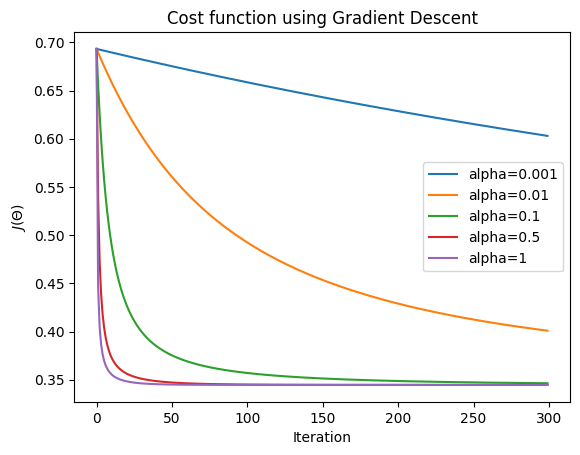

In [5]:
# Plotting cost function using gradient descent
alphas = [0.001, 0.01, 0.1, 0.5, 1]
iterations = 5000
initial_theta = np.zeros(n_size)
theta = None
lowestCost = 2**63
bestAlpha = None
for alpha in alphas:
    thisTheta, J_history = gradientDescent(X_norm, y, initial_theta, alpha, iterations)
    plt.plot(range(300), J_history[:300], label = "alpha=" + str(alpha))
    if J_history[-1] < lowestCost:
        theta = thisTheta
        lowestCost = J_history[-1]
        bestAlpha = alpha

print("Best learning rate", bestAlpha)
print("Lowest cost", round(lowestCost,4))
print("Best theta", theta)

plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")
plt.legend()
plt.show()



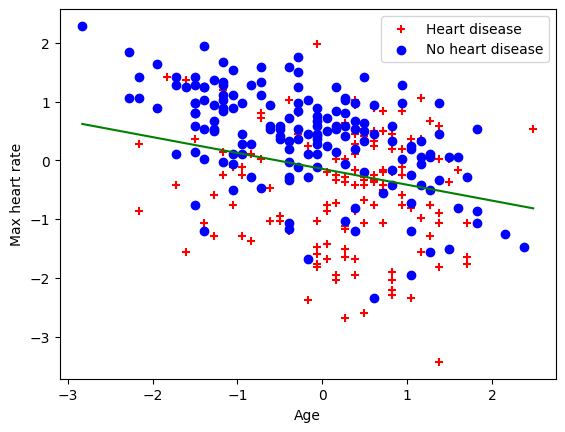

In [6]:
pos = y==1
neg = y==0
plt.scatter(X_norm[pos[:,0],1],X_norm[pos[:,0],8],c="r",marker="+", label = "Heart disease")
plt.scatter(X_norm[neg[:,0],1],X_norm[neg[:,0],8],c="b",marker="o", label = "No heart disease")

plt.xlabel("Age")
plt.ylabel("Max heart rate")
plt.legend()

#Sugestion how to plot the decision boundary (the green line)
x_value = np.array([np.min(X_norm[:,1]),np.max(X_norm[:,1])])
y_value = -( (theta[0] +theta[1]*x_value)/theta[8] )
plt.plot(x_value,y_value, "g")

plt.show()

In [7]:
# Prediction

def predict(x_test):
    assert x_test.shape[0] == n
    x_test = (x_test - X_mean)/X_std
    x_test = np.append(np.ones(1),x_test)
    prob = sigmoid(x_test.dot(theta))
    hasHeartDisease = prob[0] >= 0.5
    if hasHeartDisease:
        strHasHeartDisease = "has heart disease"
    else:
        strHasHeartDisease = "no heart disease"
    print("Prediction " + str(round(prob[0],2)) + " => " + strHasHeartDisease)

healthy_person_test = np.array([38.0, # age
                   1, # sex
                   1.0, # chestPainType
                   85.0, # restingBP
                   140.0, # serumCholesterol
                   1.0, # fastingBloodSugar
                   2.0, # restingEgc
                   180.0, # maxHeartRate
                   0.0, # exerciseInducedAngina
                   3.3, # stDepression
                   1.0, # stSlope
                   2.0, # majorVessels
                   6.0]) # thalassemia
predict(healthy_person_test)

unhealthy_person_test = np.array([79.0, # age
                   1, # sex
                   1.0, # chestPainType
                   85.0, # restingBP
                   140.0, # serumCholesterol
                   1.0, # fastingBloodSugar
                   2.0, # restingEgc
                   80.0, # maxHeartRate
                   0.0, # exerciseInducedAngina
                   3.3, # stDepression
                   1.0, # stSlope
                   3.0, # majorVessels
                   7.0]) # thalassemia
predict(unhealthy_person_test)

Prediction 0.18 => no heart disease
Prediction 0.83 => has heart disease


In [8]:
def classifierPredict(theta,X):
    """
    take in numpy array of theta and X and predict the class 
    """
    predictions = X_norm.dot(theta)
    return predictions>0

p=classifierPredict(theta,X)
print("Train Accuracy:", round((sum(p==y)[0] / X.shape[0])*100, 2),"%")

Train Accuracy: 84.85 %


# Regularized Logistic Regression

In [9]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cost_function_reg(X, y, theta, lam):
    m = len(y)
    h = sigmoid(X @ theta)
    J = -1/m * (y.T @ np.log(h) + (1 - y).T @ np.log(1 - h)) + lam/(2*m) * (theta[1:].T @ theta[1:])
    grad = 1/m * X.T @ (h - y) + lam/m * np.vstack([0, theta[1:]])
    return J[0][0], grad

def gradient_descent(X, y, theta, alpha, lam, num_iters):
    m = len(y)
    J_history = []
    for i in range(num_iters):
        cost, grad = cost_function_reg(X, y, theta, lam)
        theta = theta - alpha * grad
        J_history.append(cost)
    return theta, J_history


Best alpha = 0.5
Best lambda = 0
Lowest cost 0.3446
Best theta [[-0.06875875]
 [-0.12796138]
 [ 0.61367059]
 [ 0.55472475]
 [ 0.42637   ]
 [ 0.25930191]
 [-0.35959244]
 [ 0.2434953 ]
 [-0.47329674]
 [ 0.43431445]
 [ 0.28799664]
 [ 0.3517782 ]
 [ 1.18833707]
 [ 0.6656411 ]]


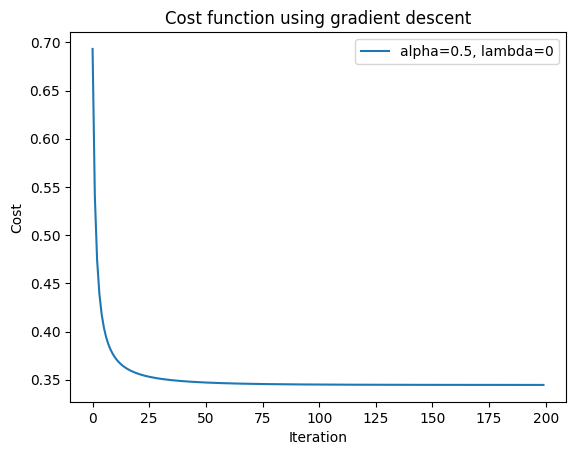

In [10]:
myX = data.iloc[:, :-1].values
my_y = data.iloc[:, -1].values.reshape(-1, 1)
# Normalize X
X_normalized = (myX - np.mean(myX, axis=0)) / np.std(myX, axis=0)
# Add intercept term to X
X_normalized = np.hstack([np.ones((len(my_y), 1)), X_normalized])

initial_theta = np.zeros((X_normalized.shape[1], 1))
alphas = [0.001, 0.01, 0.1, 0.5, 1]
lambdas = [0, 0.001, 0.01, 0.1, 0.5, 1]
num_iters = 5000
bestAlpha = None
bestLambda = None
best_J_history = None
theta = None
lowestCost = 2**63

for alpha in alphas:
    for Lambda in lambdas:
        thisTheta, J_history = gradient_descent(X_normalized, my_y, initial_theta, alpha, Lambda, num_iters)
        if J_history[-1] < lowestCost:
            lowestCost = J_history[-1]
            bestAlpha = alpha
            bestLambda = Lambda
            theta = thisTheta
            best_J_history = J_history
        label = "alpha=" + str(alpha) + ", lambda=" + str(Lambda)
        #plt.plot(range(num_iters), J_history, label=label)

print("Best alpha =", bestAlpha)
print("Best lambda =", bestLambda)
print("Lowest cost", round(lowestCost,4))
print("Best theta", theta)

plt.plot(range(200), best_J_history[:200], label="alpha=" + str(bestAlpha) + ", lambda=" + str(bestLambda))
#plt.plot(range(num_iters), J_history)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost function using gradient descent')
plt.legend()
plt.show()

In [11]:
predict(healthy_person_test)
predict(unhealthy_person_test)

Prediction 0.18 => no heart disease
Prediction 0.83 => has heart disease


In [12]:
p=classifierPredict(theta, X)
trainAcc = (sum(p==y)/len(y)*100)[0]
print("Train Accuracy:", round(trainAcc, 2),"%") 

Train Accuracy: 84.85 %


# Sklearn

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve, GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, balanced_accuracy_score, accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

def printResults(model, y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    print("Test set accuracy (% correct predicts):", round(accuracy,2))
    trainingSetAcc = model.score(X_train_scaled, y_train)
    print("Training set accuracy:", round(trainingSetAcc, 2))
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    print("Balanced accuracy:", round(balanced_accuracy,2))
    print("Precision:", round(precision, 2))
    print("Recall:", round(recall, 2))
    print("F1-score:", round(f1, 2))
    print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification report:\n", classification_report(y_test, y_pred))
    
def plotLearningCurve(model):
    train_sizes, train_scores, test_scores = learning_curve(model, X_train_scaled, y_train, cv=5)

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure()
    plt.title("Learning Curve with k=5 folds")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.ylim(0.0, 1.1)
    plt.grid()

    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()
    
def plotROC(model):
    # Get predicted probabilities for ROC curve
    
    y_pred_proba = model.predict_proba(X_test_scaled)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    optimal_idx = np.argmax(tpr - fpr)
    optimal_threshold = thresholds[optimal_idx]
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')
    plt.legend(loc="lower right")
    plt.show()
    print("Optimal classification threshold:", round(optimal_threshold, 2))
    return optimal_threshold
    
def predict(model, example):
    example = example.reshape(1,-1)
    predicted_class = model.predict(example)[0]
    predicted_prob = model.predict_proba(example)[0][0]
    print(predicted_prob, predicted_class)
    return None
    #y_pred = (model.predict_proba(example)[:, 1] >= 0.5).astype(int)
    print("Heart disease probability:", round(predicted_prob,2))
    print("Class:", predicted_class, end="")
    if predicted_prob == 0:
        print(" (no heart disease)")
    else:
        print(" (has heart disease)")
    return predicted_prob, predicted_class

In [14]:
X_train, X_test, y_train, y_test = train_test_split(data.drop("diagnosis", axis=1), 
                                                data["diagnosis"], 
                                                test_size=0.25, 
                                                random_state=60)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Log Reg Unregularized


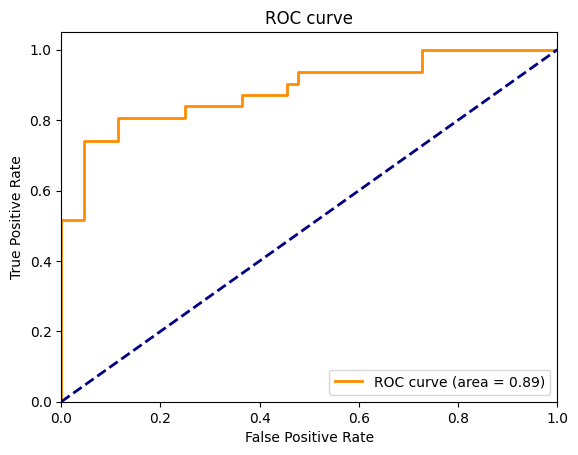

Optimal classification threshold: 0.76
Test set accuracy (% correct predicts): 0.85
Training set accuracy: 0.87
Balanced accuracy: 0.83
Precision: 0.86
Recall: 0.85
F1-score: 0.85
Confusion matrix:
 [[42  2]
 [ 9 22]]
Classification report:
               precision    recall  f1-score   support

           0       0.82      0.95      0.88        44
           1       0.92      0.71      0.80        31

    accuracy                           0.85        75
   macro avg       0.87      0.83      0.84        75
weighted avg       0.86      0.85      0.85        75



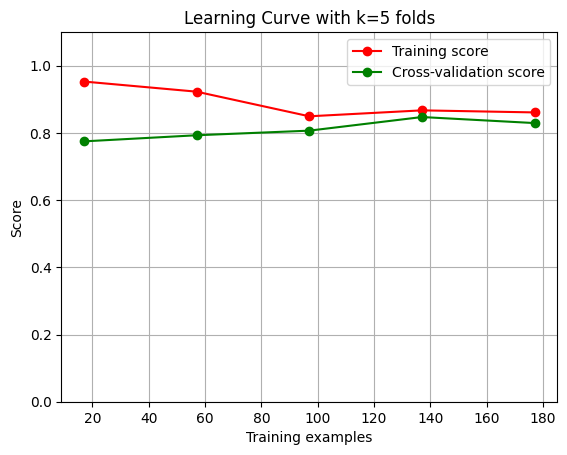

'# use this semicolon to remove unnecessary prints'

In [15]:
# -- Log Reg Unregularized --

print("Log Reg Unregularized")
model = LogisticRegression(max_iter=10000)
model.fit(X_train_scaled, y_train)
#y_pred = model.predict(X_test_scaled)

optimalThreshold = plotROC(model)

y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
y_pred = (y_pred_proba > optimalThreshold).astype(int)

printResults(model, y_test, y_pred)
plotLearningCurve(model)
;

Log Reg Regularized (penalty l2) with CV with k=5
Best C 0.01


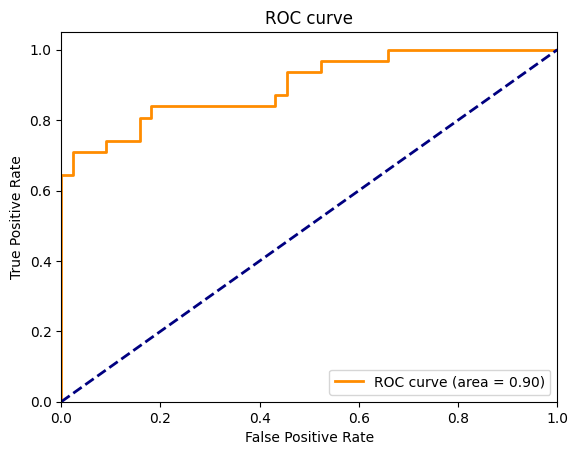

Optimal classification threshold: 0.62
Test set accuracy (% correct predicts): 0.85
Training set accuracy: 0.86
Balanced accuracy: 0.83
Precision: 0.87
Recall: 0.85
F1-score: 0.85
Confusion matrix:
 [[43  1]
 [10 21]]
Classification report:
               precision    recall  f1-score   support

           0       0.81      0.98      0.89        44
           1       0.95      0.68      0.79        31

    accuracy                           0.85        75
   macro avg       0.88      0.83      0.84        75
weighted avg       0.87      0.85      0.85        75



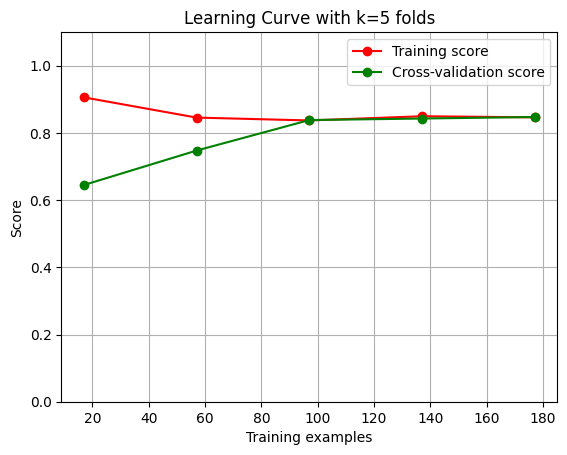

'# use this semicolon to remove unnecessary prints'

In [16]:
# -- Log Reg Regularized --
# Train with regulurazitaion and find best hyperparameters (C) with Cross Validation
# smaller C prevents overfitting

penalty="l2"
listC=[0.001, 0.01, 0.1, 0.5, 1, 10]
k=5
print("Log Reg Regularized (penalty " + penalty + ") with CV with k=" + str(k))

bestAcc = 0
bestC = None
for C in listC:
    model = LogisticRegression(max_iter=10000, penalty=penalty, C=C)
    scores = cross_val_score(model, X_train_scaled, y_train, cv=k)
    mean_score = scores.mean()
    if mean_score > bestAcc:
        bestAcc = mean_score
        bestC = C
print("Best C", bestC)

model = LogisticRegression(max_iter=10000, penalty=penalty, C=bestC)
model.fit(X_train_scaled, y_train)
#y_pred = model.predict(X_test_scaled)

optimalThreshold = plotROC(model)

y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
y_pred = (y_pred_proba > optimalThreshold).astype(int)

printResults(model, y_test, y_pred)
plotLearningCurve(model)
;